In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pickle import dump,load
import time
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.distributions.multivariate_normal import  MultivariateNormal

parent_dir = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
sys.path.insert(0, parent_dir)
import gptransform

torch.set_num_threads(80)

ModuleNotFoundError: No module named 'torch'

In [2]:
init_param_bounds = torch.zeros((8,2))

### Width Function Params ###

# Ell
init_param_bounds[0,1] = 2.5
init_param_bounds[0,0] = 0.1

# Max
init_param_bounds[1,1] = 4
init_param_bounds[1,0] = 0.2

# Slope
init_param_bounds[2,1] = 10
init_param_bounds[2,0] = 1

# Loc
init_param_bounds[3,1] = 6
init_param_bounds[3,0] = 0.5

# Decay
init_param_bounds[4,1] = 1
init_param_bounds[4,0] = 0.05

### Experimental Noise ###

# Sigma_n
init_param_bounds[5,1] = 0.5
init_param_bounds[5,0] = 0.0001

### Non-Bonded Peaks in Mean ###

# r_0
init_param_bounds[6,1] = 11
init_param_bounds[6,0] = 0.5

# s
init_param_bounds[7,1] = 50
init_param_bounds[7,0] = 0.1

init_params = torch.sum(init_param_bounds,dim=1)/2

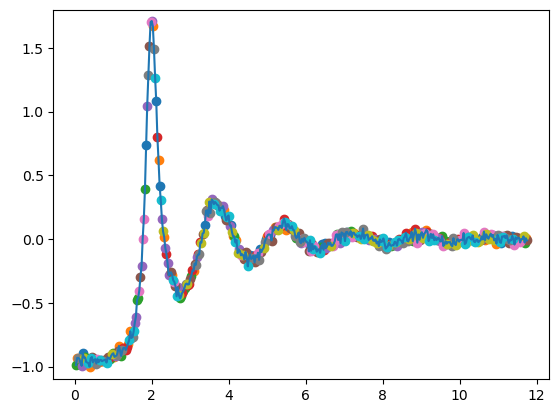

In [3]:
r_grid =  torch.linspace(0.0001, 50, 1000).reshape(-1,1)
r_infer = torch.linspace(0.0001, 40, 400).reshape(-1,1)

my_data = np.genfromtxt("Yarnell_Sq_Ar_1973.csv", delimiter=',')
q_train = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
sq_train = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float() - 1 + torch.normal(0, 0.025, size=q_train.size())

my_data = np.genfromtxt("Yarnell_gr_Ar_1973.csv", delimiter=',')
r_reported = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
gr_reported = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float()

q_infer = q_train

perm = torch.randperm(len(q_train))

# Put into PyTorch Dataloader
dataset = gptransform.data(q_train[perm].reshape(10,40,1),sq_train[perm].reshape(10,40,1))

for batch, (X, y) in enumerate(dataset):
    # Compute prediction and loss
    plt.scatter(X[0], y[0],label="Batch # " + str(batch))
plt.plot(q_train,sq_train)
plt.ylim(-1.1,1.8)
#plt.legend()
plt.show()

In [4]:
gp = gptransform.GP(init_params,init_param_bounds,0,0.02125,5_000)
gp.print_params()

l:       1.300000 
max:     2.100000 
slope:   5.500000 
loc:     3.250000 
decay:   0.525000 
sigma_n: 0.250050 
r_0:     5.750000 
s:       25.050001 


Average loss: -12.359641  [    0/  100]
l:       1.159952 
max:     2.113789 
slope:   5.752711 
loc:     3.630829 
decay:   0.553509 
sigma_n: 0.104378 
r_0:     4.677409 
s:       24.946646 
Minutes Taken Since Last Report: 0.258571 



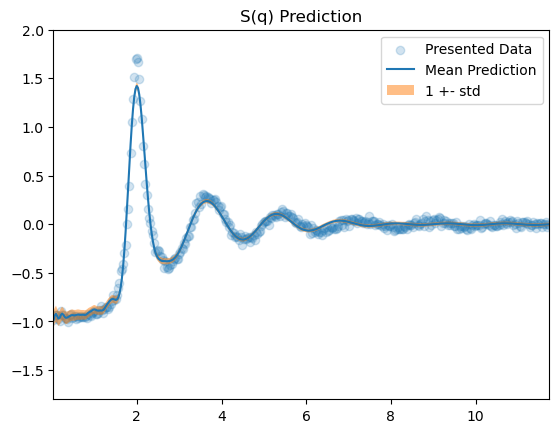

Average loss: -38.538888  [   10/  100]
l:       0.521224 
max:     2.682436 
slope:   7.142880 
loc:     2.618156 
decay:   0.362170 
sigma_n: 0.028331 
r_0:     8.167337 
s:       7.032818 
Minutes Taken Since Last Report: 2.364841 



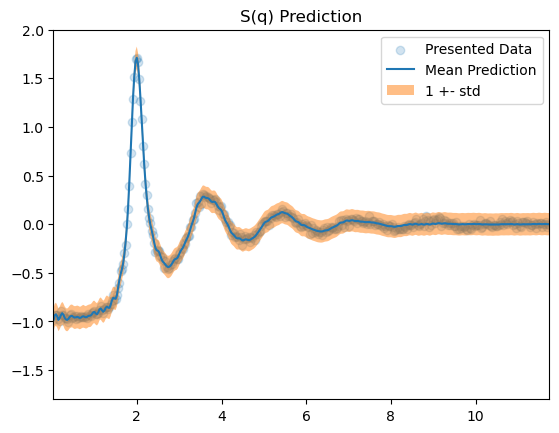

Average loss: -42.735382  [   20/  100]
l:       0.416220 
max:     2.424684 
slope:   7.222894 
loc:     1.581262 
decay:   0.384257 
sigma_n: 0.026517 
r_0:     5.480826 
s:       4.357854 
Minutes Taken Since Last Report: 2.383725 



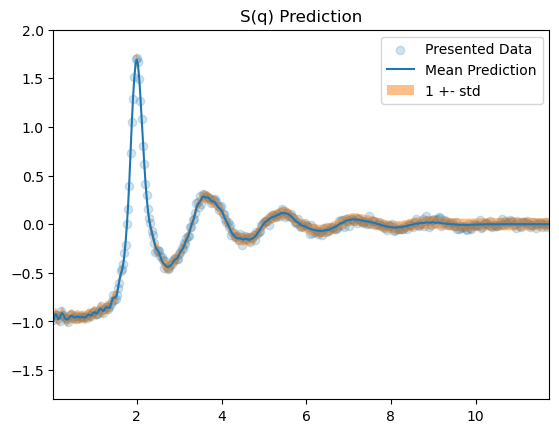

Average loss: -42.980221  [   30/  100]
l:       0.413796 
max:     1.992359 
slope:   7.144850 
loc:     2.288692 
decay:   0.395337 
sigma_n: 0.026546 
r_0:     4.926605 
s:       3.516047 
Minutes Taken Since Last Report: 2.351072 



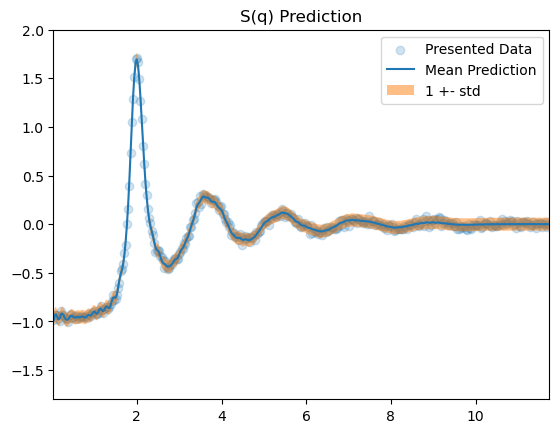

Average loss: -46.986184  [   50/  100]
l:       0.460644 
max:     1.281153 
slope:   7.846121 
loc:     3.401967 
decay:   0.371117 
sigma_n: 0.026976 
r_0:     3.836624 
s:       7.277773 
Minutes Taken Since Last Report: 2.271098 



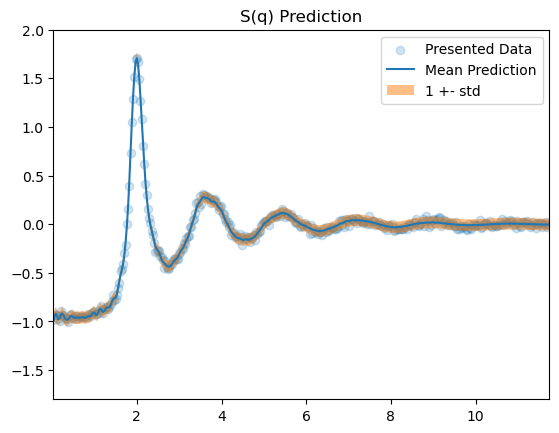

Average loss: -45.273738  [   60/  100]
l:       0.344656 
max:     1.478908 
slope:   7.882863 
loc:     1.628638 
decay:   0.329328 
sigma_n: 0.024643 
r_0:     3.108173 
s:       9.097013 
Minutes Taken Since Last Report: 2.339256 



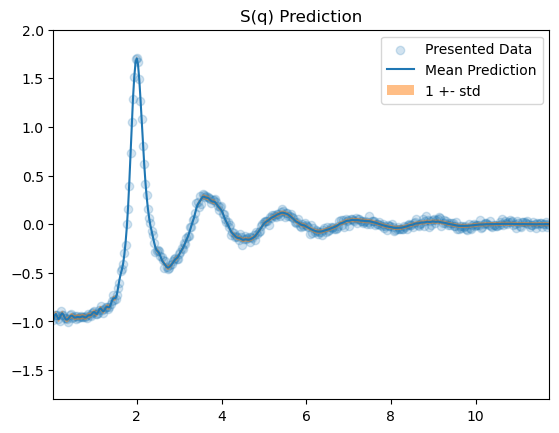

Average loss: -45.165182  [   70/  100]
l:       0.381781 
max:     1.111246 
slope:   7.850441 
loc:     3.262737 
decay:   0.355781 
sigma_n: 0.024019 
r_0:     3.333109 
s:       9.639847 
Minutes Taken Since Last Report: 2.281020 



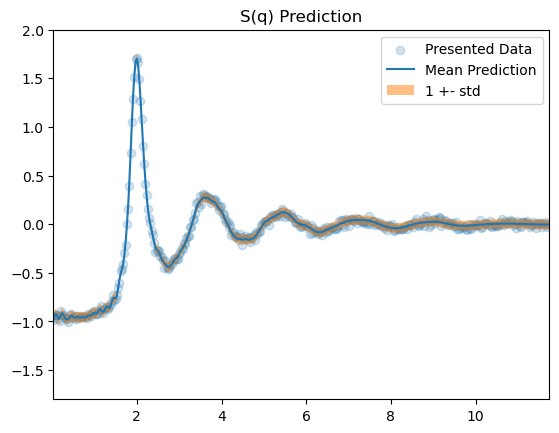

Average loss: -44.807237  [   80/  100]
l:       0.404092 
max:     1.626440 
slope:   7.943562 
loc:     3.044080 
decay:   0.394533 
sigma_n: 0.024228 
r_0:     5.756580 
s:       7.565869 
Minutes Taken Since Last Report: 2.269926 



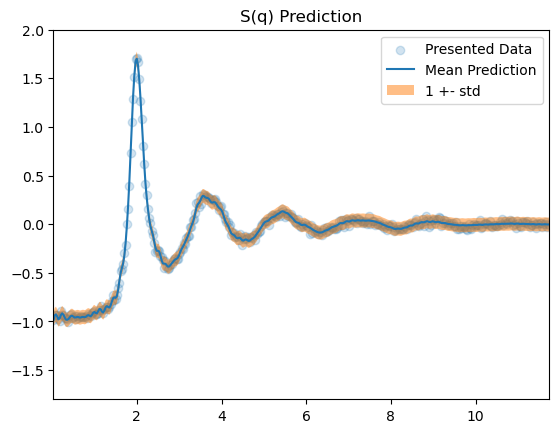

Average loss: -42.688335  [   90/  100]
l:       0.381006 
max:     2.043937 
slope:   7.831336 
loc:     1.350951 
decay:   0.349299 
sigma_n: 0.025034 
r_0:     4.214364 
s:       6.487683 
Minutes Taken Since Last Report: 2.290421 



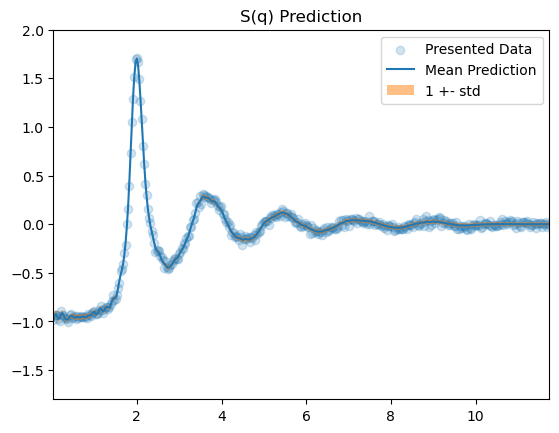

In [5]:
optimizer = torch.optim.SGD(gp.parameters(),lr=1e-3)
losses = gptransform.train_loop(dataset, gp, optimizer, 100, r_grid, q_train, sq_train, q_infer, r_infer, -1.8,2, -0.1,3.1)

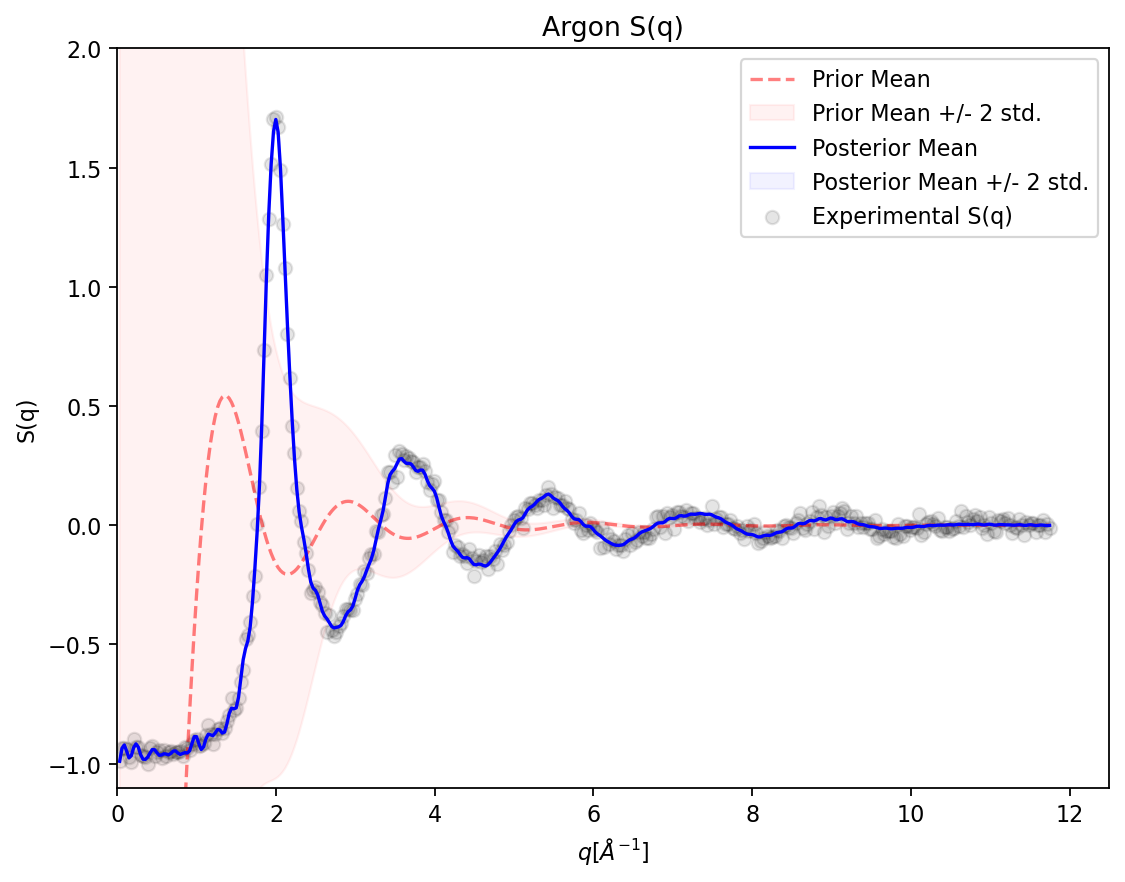

In [6]:
with torch.no_grad():
    figure(figsize=(8, 6), dpi=160)

    # Calculate Prior Mean and Cov
    Σ_q_prior = gp.K_qq(r_grid,r_grid,q_infer,q_infer).detach()
    μ_q_prior = gp.mean_q(r_grid,q_infer).detach()

    # Calculate Posterior Mean and Cov
    μ_q_post, Σ_q_post = gp.predict_sq_trapz(r_grid, q_infer, q_train, sq_train,adjust=False)
    μ_q_post = μ_q_post.detach()
    Σ_q_post = Σ_q_post.detach()

    # Plot Prior
    plt.plot(q_infer.T[0],μ_q_prior.T[0],label="Prior Mean",linestyle='dashed',alpha=0.5,color='r')
    plt.fill_between(q_infer.T[0],μ_q_prior.T[0] + 2*torch.diag(Σ_q_prior), μ_q_prior.T[0] - 2*torch.diag(Σ_q_prior),alpha=0.05,label="Prior Mean +/- 2 std.",color='r')
    
    # Plot Posterior
    plt.plot(q_infer.T[0],μ_q_post.T[0],label="Posterior Mean",color='b')
    plt.fill_between(q_infer.T[0],μ_q_post.T[0] + 2*torch.diag(Σ_q_post), μ_q_post.T[0] - 2*torch.diag(Σ_q_post),alpha=0.05,label="Posterior Mean +/- 2 std.",color='b')

    # Experimental Data
    plt.scatter(q_train,sq_train,label='Experimental S(q)',alpha=0.1,color='k')

    # Plot Settings
    plt.xlim(0,12.5)
    plt.ylim(-1.1,2)
    plt.title('Argon S(q)')
    plt.xlabel('$q [Å^{-1}]$')
    plt.ylabel('S(q)')
    plt.legend()
    plt.show()

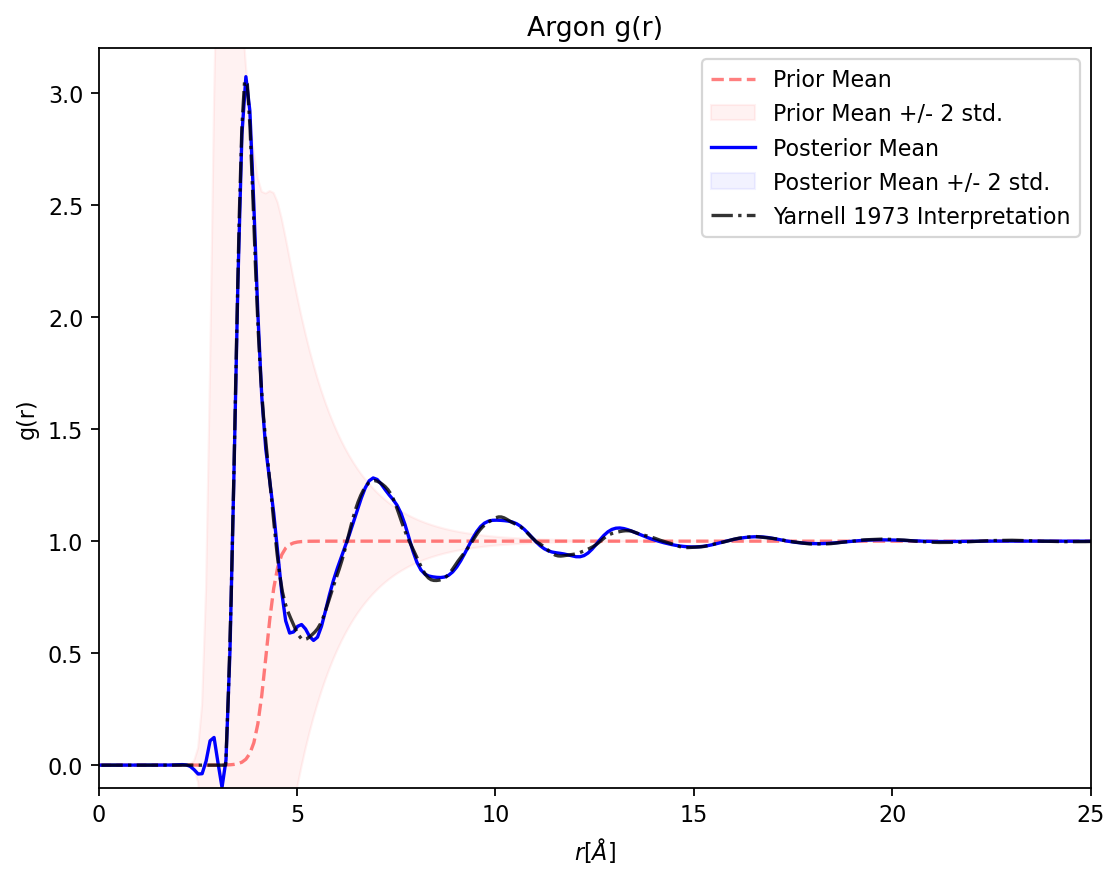

In [7]:
with torch.no_grad():
    figure(figsize=(8, 6), dpi=160)

    # Calculate Prior Mean and Cov
    Σ_r_prior = gp.K_rr(r_infer,r_infer).detach()
    μ_r_prior = gp.mean_r(r_infer).detach()

    # Calculate Posterior Mean and Cov
    μ_r_post, Σ_r_post = gp.predict_rdf_trapz(r_grid, r_infer, q_train, sq_train,adjust=False)
    μ_r_post = μ_r_post.detach()
    Σ_r_post = Σ_r_post.detach()

    # Plot Prior
    plt.plot(r_infer.T[0],μ_r_prior.T[0],label="Prior Mean",linestyle='dashed',alpha=0.5,color='r')
    plt.fill_between(r_infer.T[0],μ_r_prior.T[0] + 2*torch.diag(Σ_r_prior), μ_r_prior.T[0] - 2*torch.diag(Σ_r_prior),alpha=0.05,label="Prior Mean +/- 2 std.",color='r')
    
    # Plot Posterior
    plt.plot(r_infer.T[0],μ_r_post.T[0],label="Posterior Mean",color='b')
    plt.fill_between(r_infer.T[0],μ_r_post.T[0] + 2*torch.diag(Σ_r_post), μ_r_post.T[0] - 2*torch.diag(Σ_r_post),alpha=0.05,label="Posterior Mean +/- 2 std.",color='b')

    # Yarnell
    plt.plot(r_reported,gr_reported,label='Yarnell 1973 Interpretation',alpha=0.8,color='k',linestyle='dashdot')

    # Plot Settings
    plt.ylim(-0.1,3.2)
    plt.xlim(0,25)
    plt.title('Argon g(r)')
    plt.xlabel('$r [Å]$')
    plt.ylabel('g(r)')
    plt.legend()
    plt.show()